In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor, Pool
import catboost as cb
from sklearn.model_selection import KFold
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split

In [32]:
train=pd.read_csv(r"C:\Users\anvay\Downloads\train.csv (2)\train.csv")
test=pd.read_csv(r"C:\Users\anvay\Downloads\train.csv (2)\test.csv")
mineral = pd.read_csv(r'C:\Users\anvay\Downloads\archive (6)\jm79zfps6b-1\Mineral_Dataset_Supplementary_Info.csv')
crystals = pd.read_csv(r'C:\Users\anvay\Downloads\archive (6)\jm79zfps6b-1\Artificial_Crystals_Dataset.csv')

In [33]:
train.columns

Index(['id', 'allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')

In [34]:
def null_func(df):
    if df.isnull().sum().any():
        print("Missing values")
    else:
        print("No Missing values")
    print(df.isnull().sum())
null_func(train)
null_func(test)    

No Missing values
id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64
No Missing values
id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64


In [35]:
train.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [36]:
def dupli(df,target):
    dup=df[df[df.columns.difference(['Hardness'])].duplicated()]
    if len(dup)>0:
        df.drop_duplicates(df,inplace=True)
        print("duplicate values dropped")
    else:
        print("no duplicate values")
dupli(train,'Hardness')
dupli(test,'Hardness')

no duplicate values
no duplicate values


In [37]:
train.columns.difference(['Hardness'])

Index(['R_cov_element_Average', 'R_vdw_element_Average',
       'allelectrons_Average', 'allelectrons_Total', 'atomicweight_Average',
       'density_Average', 'density_Total', 'el_neg_chi_Average', 'id',
       'ionenergy_Average', 'val_e_Average', 'zaratio_Average'],
      dtype='object')

C:\Users\anvay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anvay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anvay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anvay\anaconda3\lib\si

<Figure size 432x288 with 0 Axes>

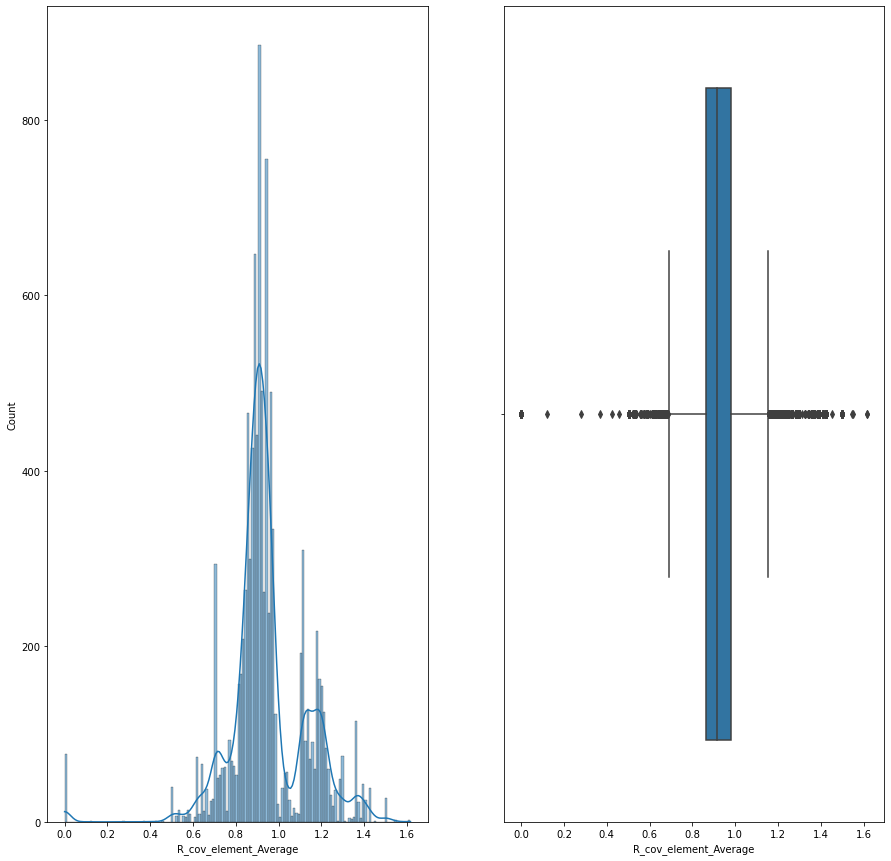

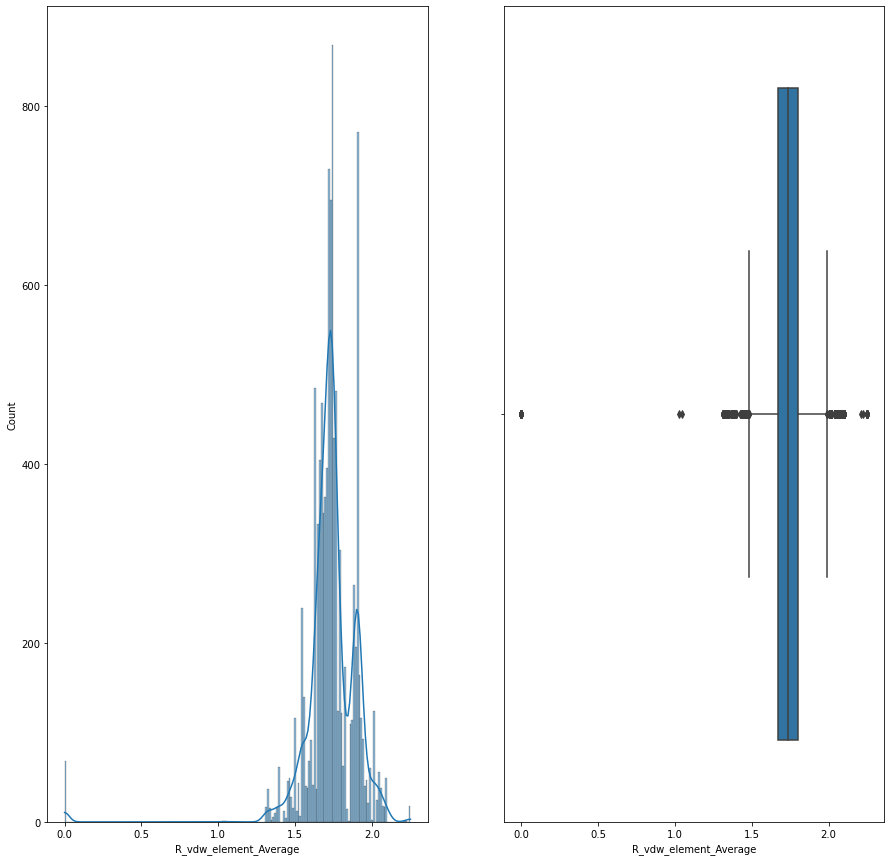

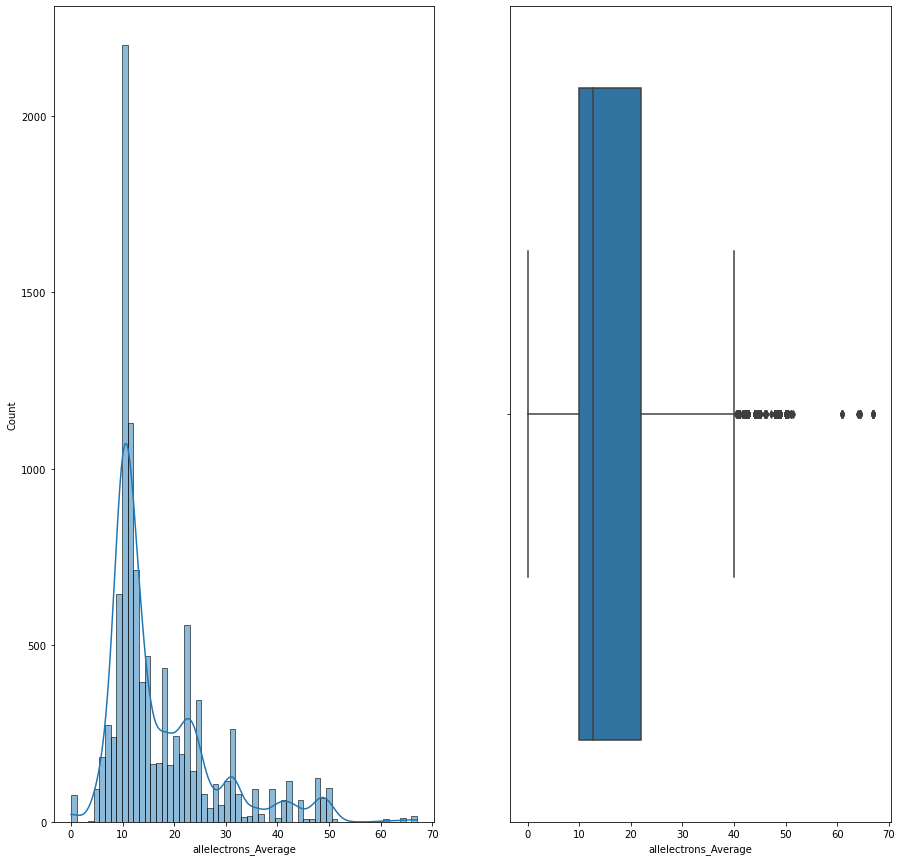

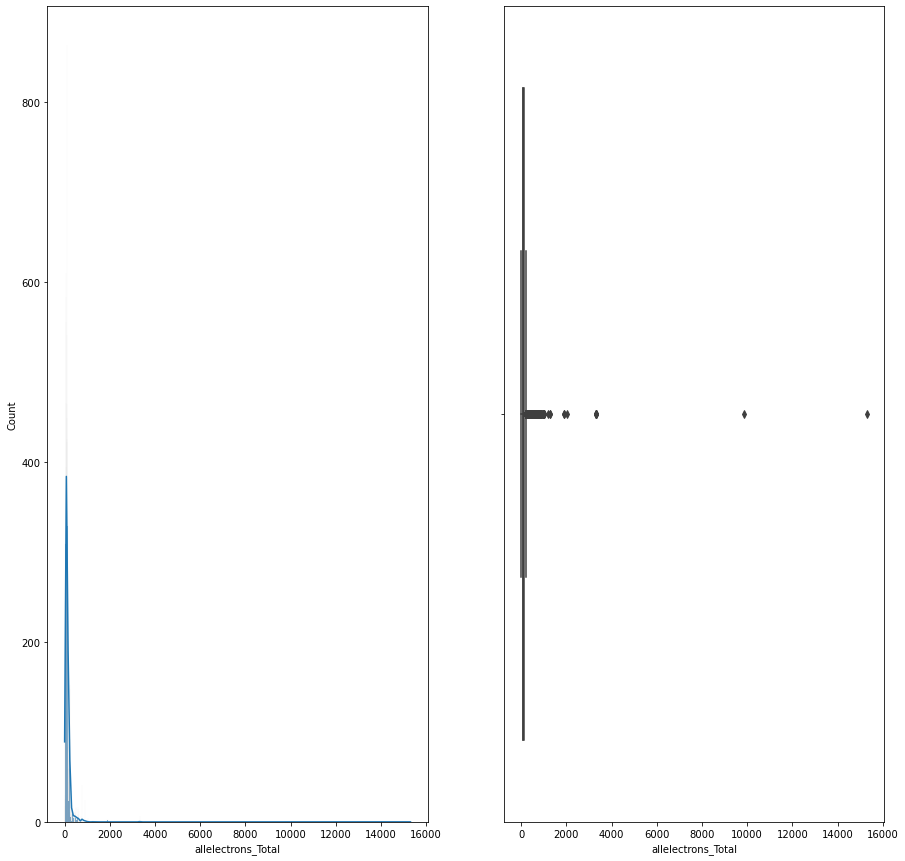

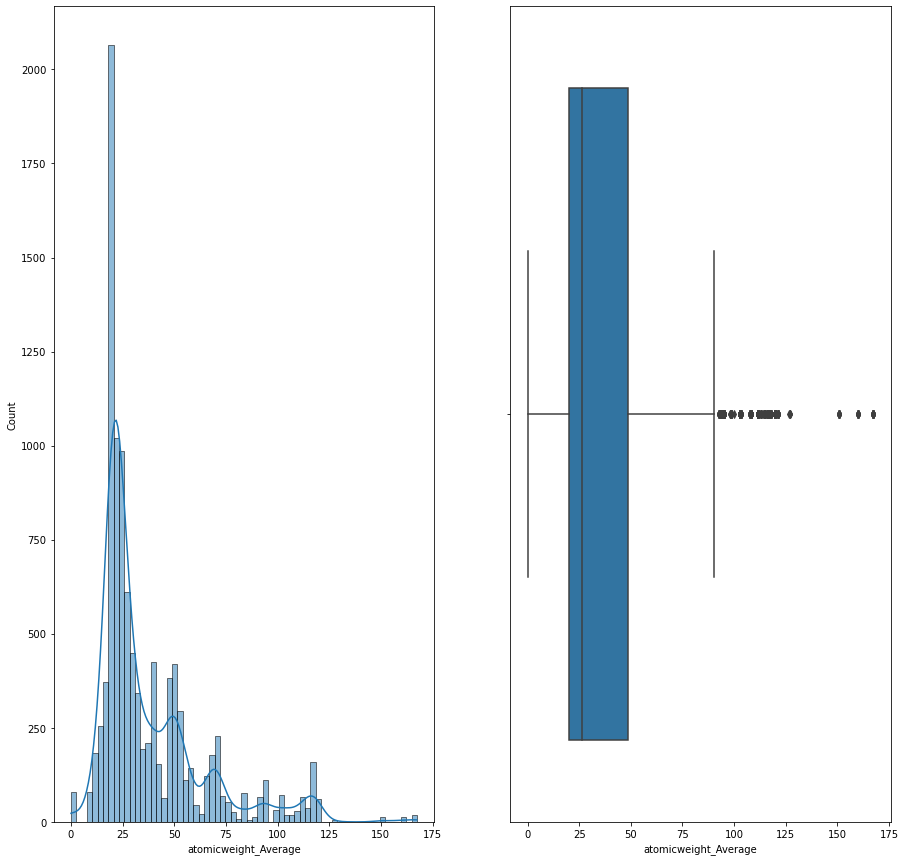

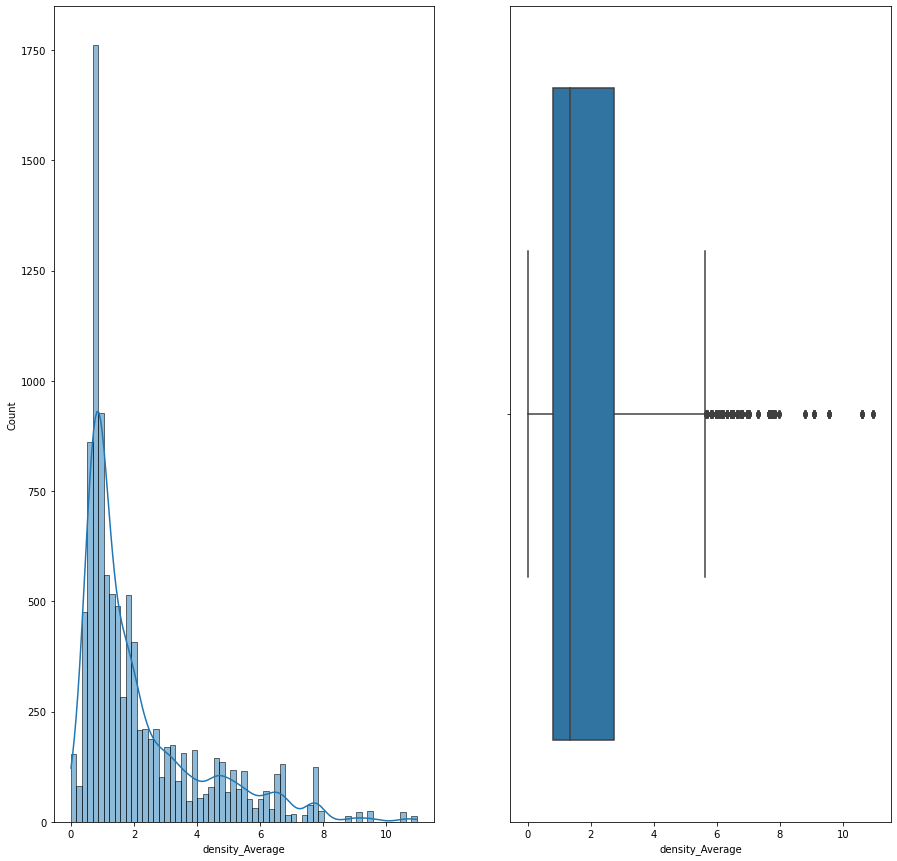

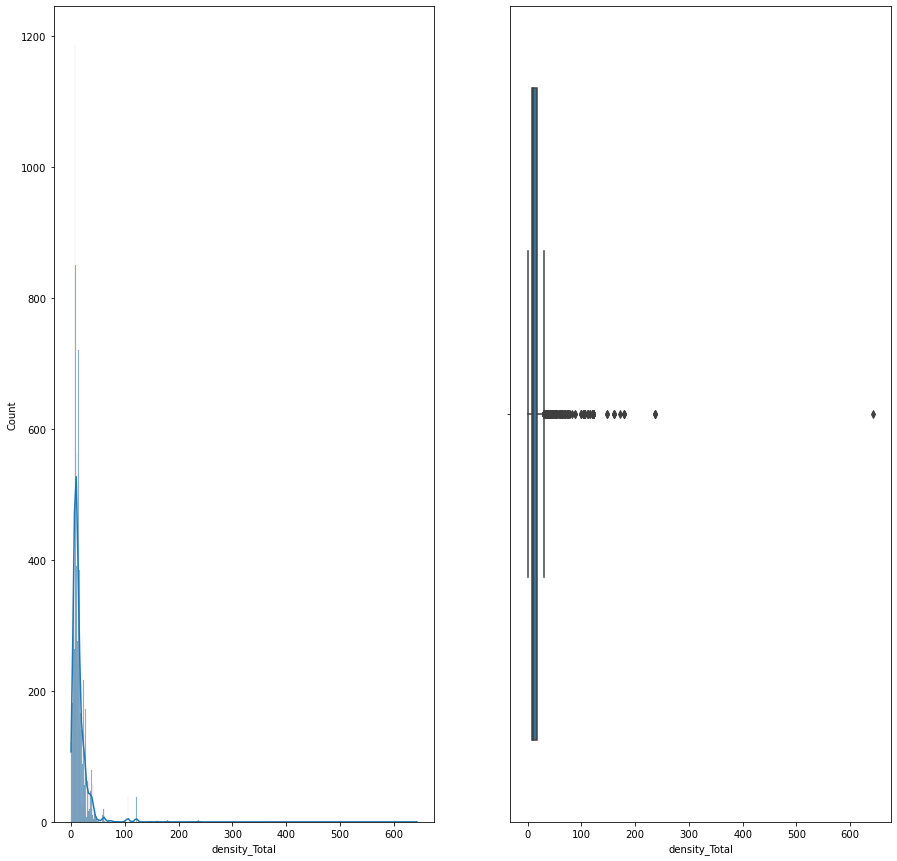

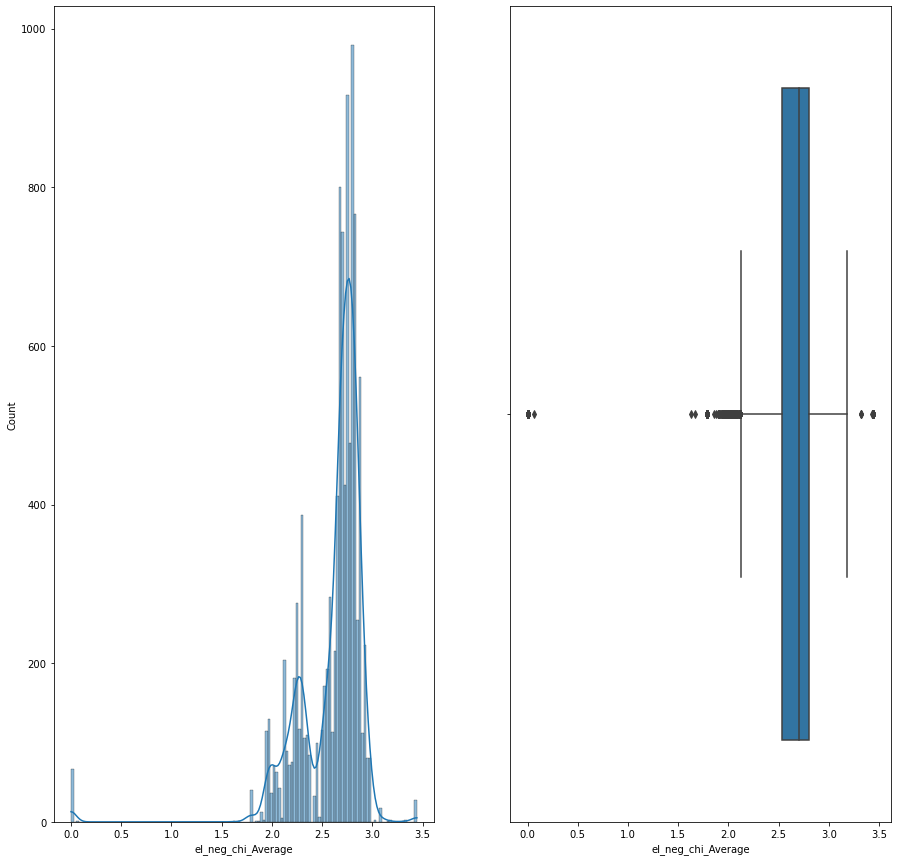

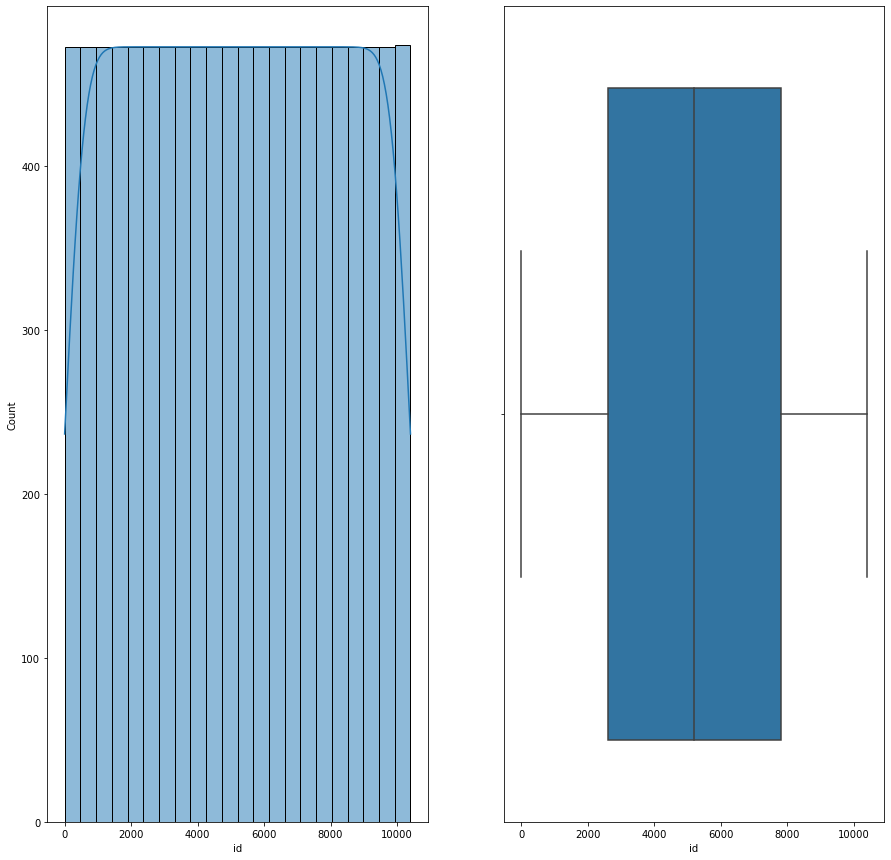

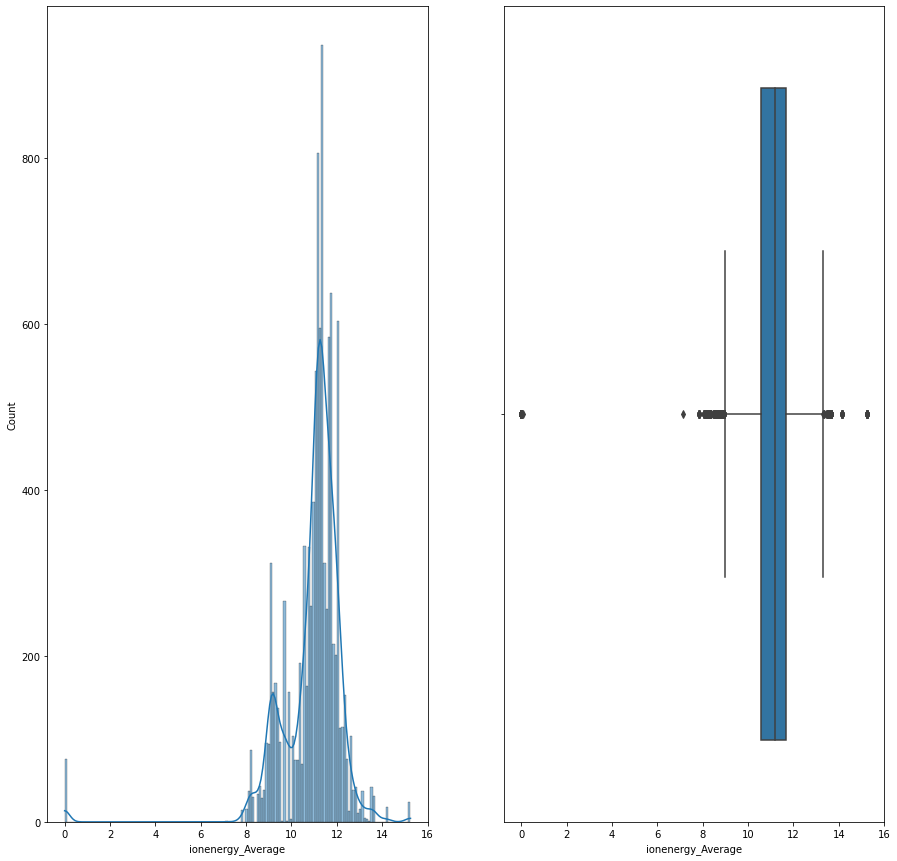

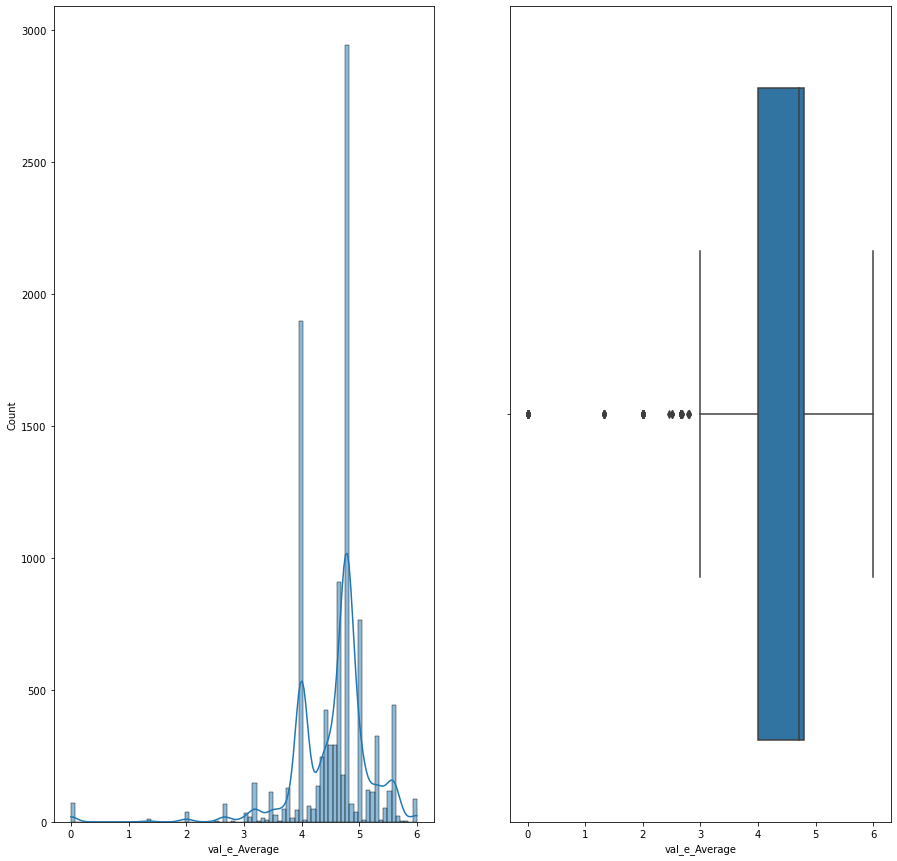

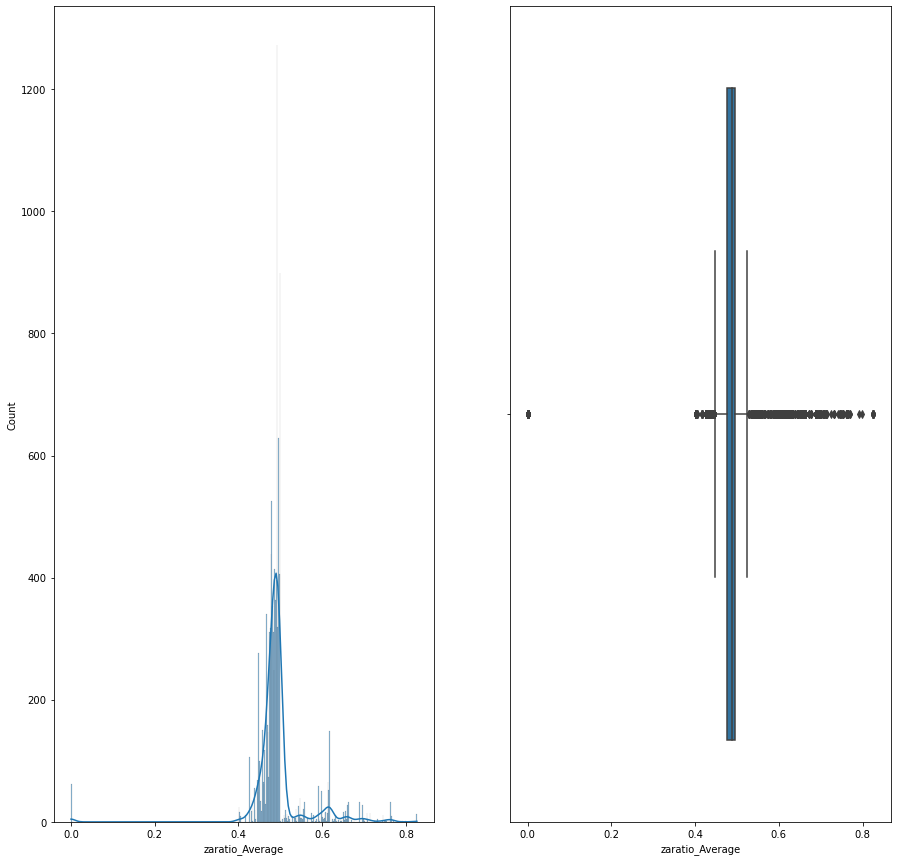

In [8]:
def plots(df):
    for i, col in enumerate(df):
        plt.figure(i)
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 15))
        sns.histplot(df[col], kde=True,ax=ax1)
        sns.boxplot(df[col],ax=ax2)
plots(train[train.columns.difference(['Hardness'])])

In [38]:
train[train['allelectrons_Total']==train['allelectrons_Total'].max()]

id  allelectrons_Total  density_Total  allelectrons_Average  \
5493  5493             15300.0     643.093804              8.027397   

      val_e_Average  atomicweight_Average  ionenergy_Average  \
5493       5.401274             16.215127          12.976603   

      el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
5493            3.179236               1.567945                0.73726   

      zaratio_Average  density_Average  Hardness  
5493          0.50503          0.58105       1.5

In [39]:
test[test['allelectrons_Total']==test['allelectrons_Total'].max()]

id  allelectrons_Total  density_Total  allelectrons_Average  \
5860  16267             10116.0     502.575708              9.492063   
6772  17179             10116.0     502.575708              5.781132   

      val_e_Average  atomicweight_Average  ionenergy_Average  \
5860       4.825397             19.379077          11.213325   
6772       5.781132             19.379077          12.976603   

      el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
5860            2.738565               1.752063               0.945714   
6772            3.184434               1.577104               0.731830   

      zaratio_Average  density_Average  
5860         0.496617          0.77420  
6772         0.497615          0.59237

In [40]:
train = train.drop(train['allelectrons_Total'].idxmax())
train = train.reset_index(drop=True)

In [41]:
train.corr()

id  allelectrons_Total  density_Total  \
id                     1.000000           -0.026289      -0.006736   
allelectrons_Total    -0.026289            1.000000       0.521714   
density_Total         -0.006736            0.521714       1.000000   
allelectrons_Average   0.001871            0.107379       0.389848   
val_e_Average         -0.003512            0.084988       0.085595   
atomicweight_Average   0.002043            0.112047       0.388825   
ionenergy_Average     -0.019507            0.034047      -0.119616   
el_neg_chi_Average    -0.015572            0.034485      -0.088883   
R_vdw_element_Average -0.003107            0.058920       0.222797   
R_cov_element_Average  0.003899            0.042642       0.265722   
zaratio_Average       -0.013691            0.039878      -0.098087   
density_Average        0.006344            0.084596       0.367543   
Hardness              -0.006973           -0.066188      -0.167429   

                       allelectrons_Average  val_e_Average  \
id                                 0.001871      -0.003512   
allelectrons_Total                 0.107379       0.084988   
density_Total                      0.389848       0.085595   
allelectrons_Average               1.000000       0.004479   
val_e_Average                      0.004479       1.000000   
atomicweight_Average               0.990660       0.001957   
ionenergy_Average                 -0.359976       0.453808   
el_neg_chi_Average                -0.319328       0.549921   
R_vdw_element_Average              0.550637       0.354677   
R_cov_element_Average              0.688653       0.189514   
zaratio_Average                   -0.328970       0.093839   
density_Average                    0.803628      -0.068810   
Hardness                          -0.400732       0.161977   

                       atomicweight_Average  ionenergy_Average  \
id                                 0.002043          -0.019507   
allelectrons_Total                 0.112047           0.034047   
density_Total                      0.388825          -0.119616   
allelectrons_Average               0.990660          -0.359976   
val_e_Average                      0.001957           0.453808   
atomicweight_Average               1.000000          -0.356574   
ionenergy_Average                 -0.356574           1.000000   
el_neg_chi_Average                -0.315974           0.773999   
R_vdw_element_Average              0.529246           0.078778   
R_cov_element_Average              0.666138          -0.235223   
zaratio_Average                   -0.327455           0.638655   
density_Average                    0.796551          -0.359671   
Hardness                          -0.403176           0.203518   

                       el_neg_chi_Average  R_vdw_element_Average  \
id                              -0.015572              -0.003107   
allelectrons_Total               0.034485               0.058920   
density_Total                   -0.088883               0.222797   
allelectrons_Average            -0.319328               0.550637   
val_e_Average                    0.549921               0.354677   
atomicweight_Average            -0.315974               0.529246   
ionenergy_Average                0.773999               0.078778   
el_neg_chi_Average               1.000000               0.122087   
R_vdw_element_Average            0.122087               1.000000   
R_cov_element_Average           -0.174332               0.811809   
zaratio_Average                  0.441227               0.002999   
density_Average                 -0.322023               0.439954   
Hardness                         0.290749              -0.061567   

                       R_cov_element_Average  zaratio_Average  \
id                                  0.003899        -0.013691   
allelectrons_Total                  0.042642         0.039878   
density_Total                       0.265722        -0.098087   
allelectrons_Average                0.688

In [42]:
for i in train.columns:
    for j in range(len(train.columns)):
        if train.corr()[i][j]>0.8 and train.corr()[i][j]!=1:
            print(i)
        else:
            continue
    

allelectrons_Average
allelectrons_Average
atomicweight_Average
R_vdw_element_Average
R_cov_element_Average
density_Average


In [43]:
train.corr()['allelectrons_Average'][5]>0.8

True

In [44]:
len(train.columns)

13

array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='allelectrons_Total', ylabel='id'>,
        <AxesSubplot:xlabel='density_Total', ylabel='id'>,
        <AxesSubplot:xlabel='allelectrons_Average', ylabel='id'>,
        <AxesSubplot:xlabel='val_e_Average', ylabel='id'>,
        <AxesSubplot:xlabel='atomicweight_Average', ylabel='id'>,
        <AxesSubplot:xlabel='ionenergy_Average', ylabel='id'>,
        <AxesSubplot:xlabel='el_neg_chi_Average', ylabel='id'>,
        <AxesSubplot:xlabel='R_vdw_element_Average', ylabel='id'>,
        <AxesSubplot:xlabel='R_cov_element_Average', ylabel='id'>,
        <AxesSubplot:xlabel='zaratio_Average', ylabel='id'>,
        <AxesSubplot:xlabel='density_Average', ylabel='id'>,
        <AxesSubplot:xlabel='Hardness', ylabel='id'>],
       [<AxesSubplot:xlabel='id', ylabel='allelectrons_Total'>,
        <AxesSubplot:xlabel='allelectrons_Total', ylabel='allelectrons_Total'>,
        <AxesSubplot:xlabel='density_Total', ylabel='all

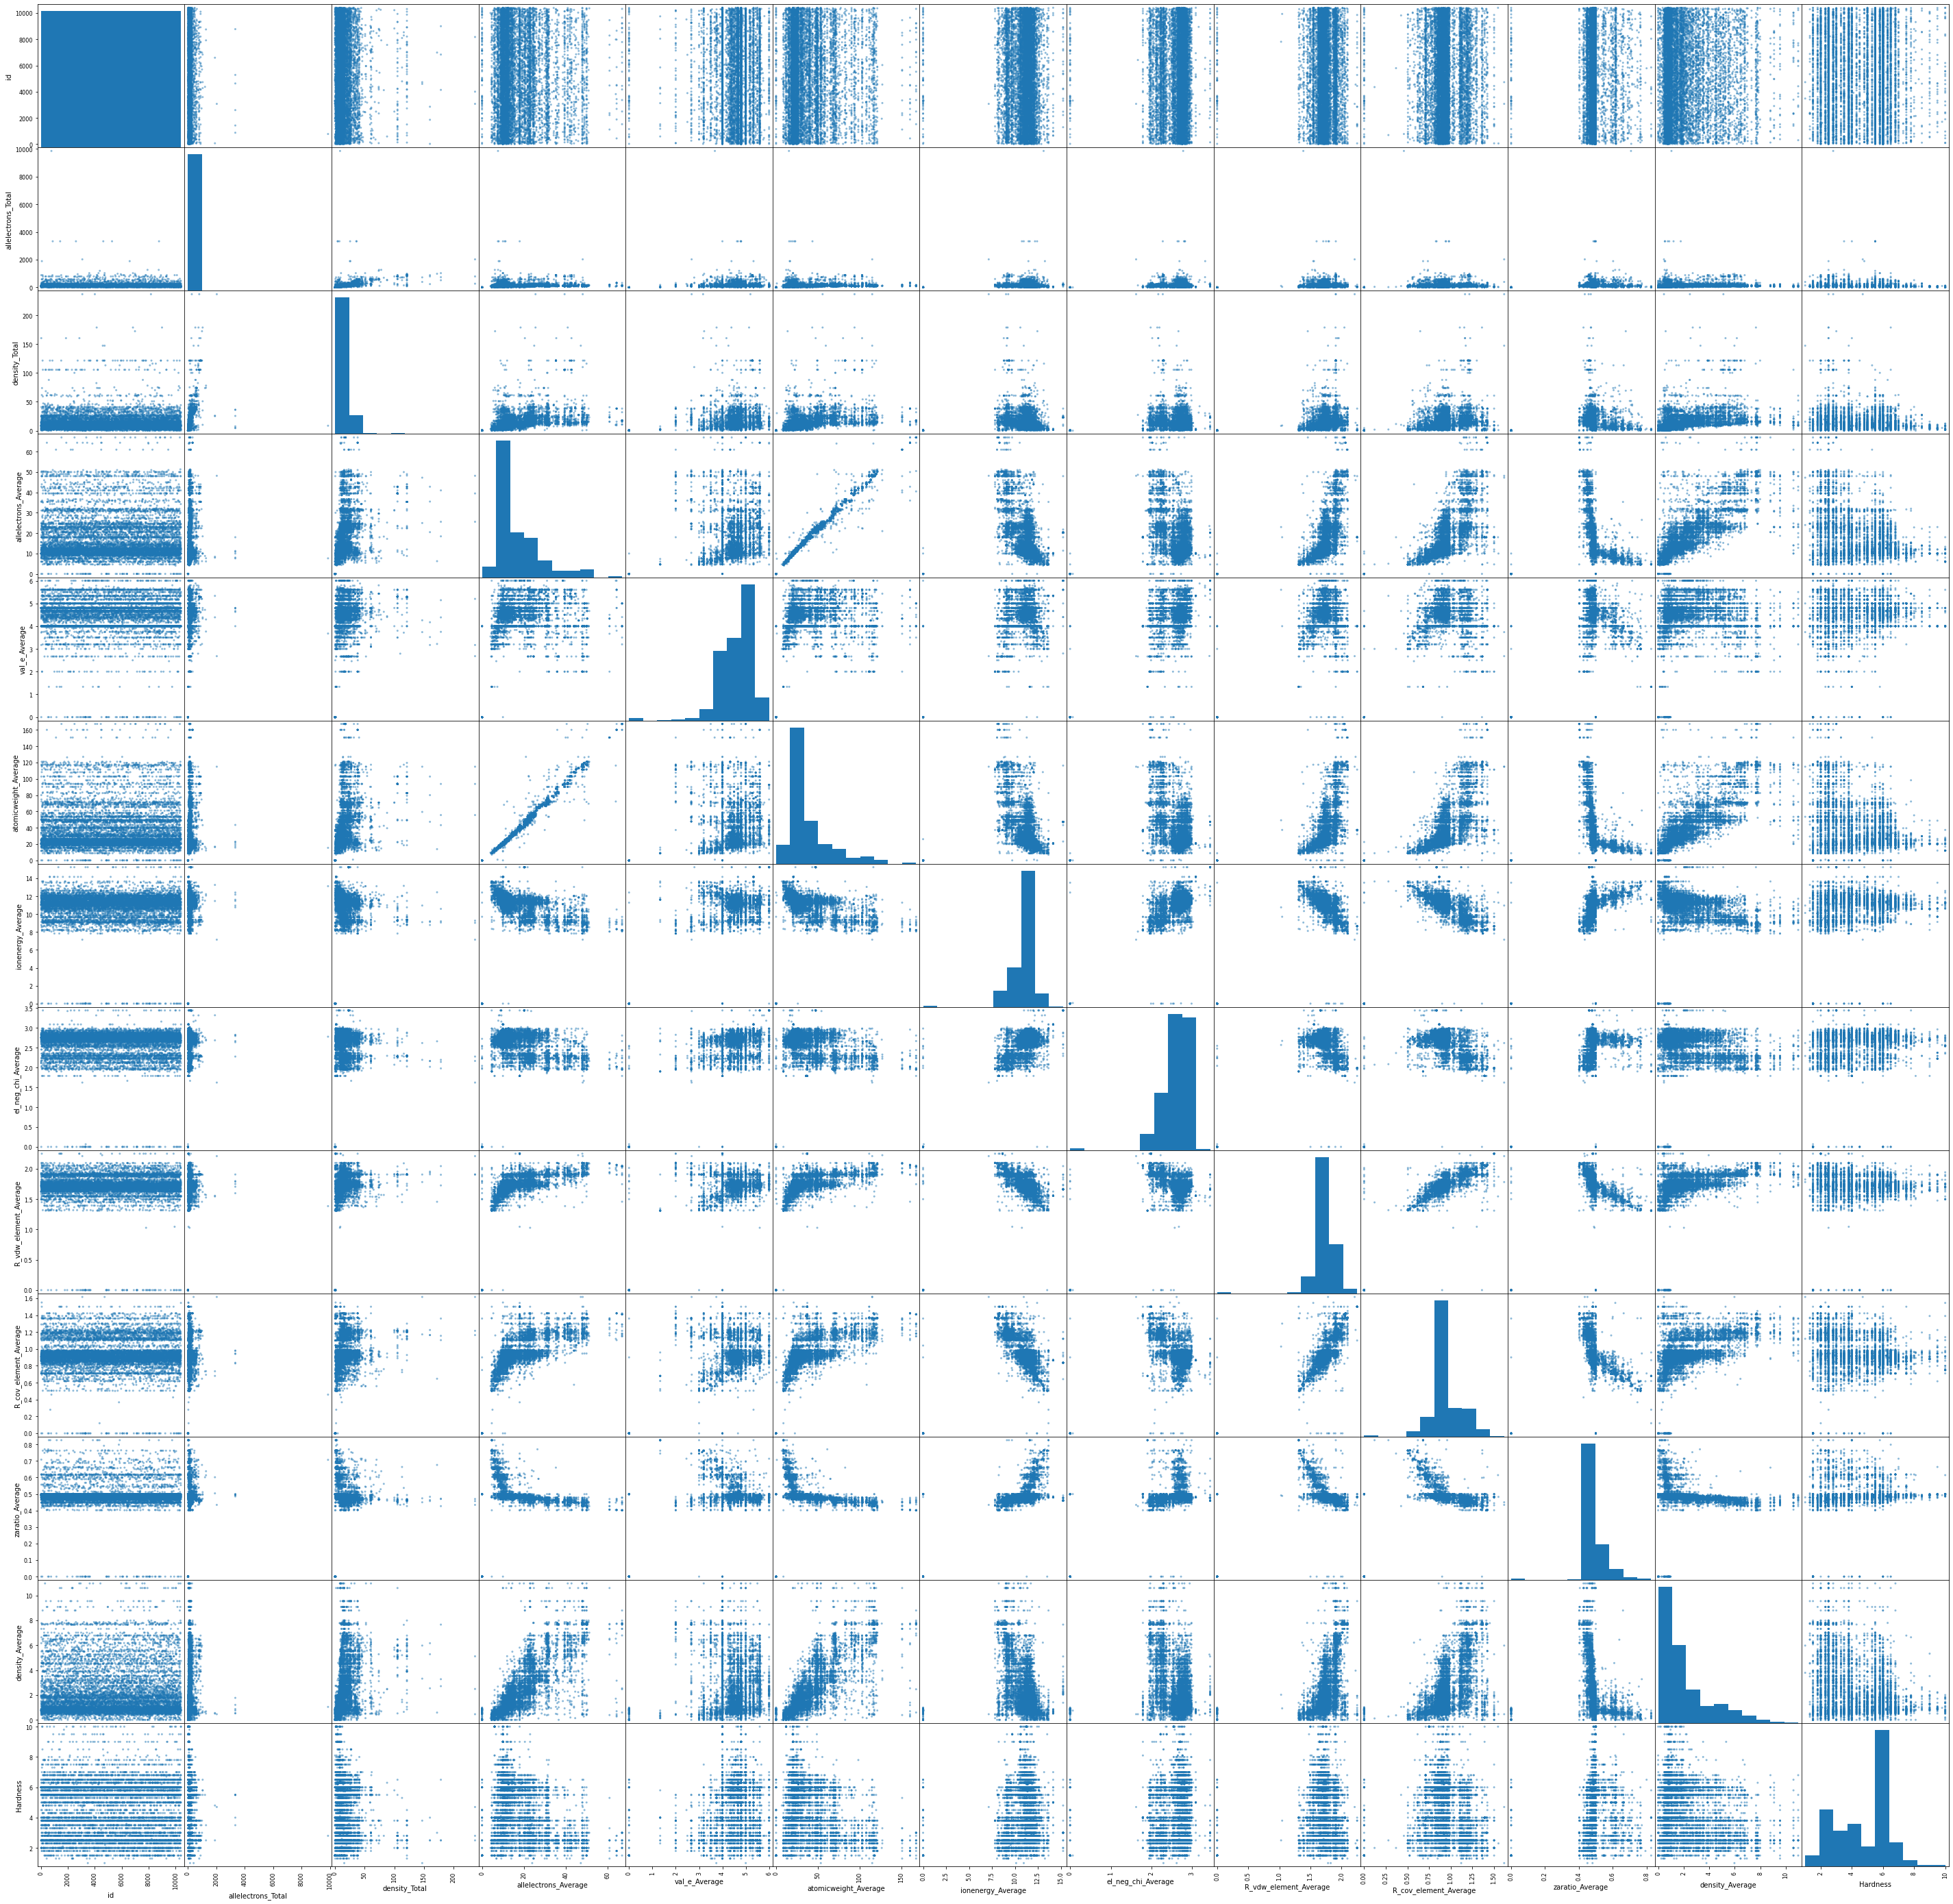

In [16]:
pd.plotting.scatter_matrix(train,figsize=(50,50))

In [45]:
mi_scores = mutual_info_regression(train[train.columns.difference(['Hardness'])], train['Hardness'])
mi_scores = pd.Series(mi_scores, name="Mutual Information", index=train.columns.difference(['Hardness']))

In [46]:
mi_scores

R_cov_element_Average    0.415077
R_vdw_element_Average    0.398084
allelectrons_Average     0.397771
allelectrons_Total       0.294905
atomicweight_Average     0.505506
density_Average          0.212689
density_Total            0.334274
el_neg_chi_Average       0.417298
id                       0.000000
ionenergy_Average        0.454002
val_e_Average            0.291618
zaratio_Average          0.487995
Name: Mutual Information, dtype: float64

In [47]:
mineral.drop(columns='Unnamed: 0', inplace=True)
mineral['source'] = 'mineral'
train['source'] = 'train'

train = pd.concat([mineral, train])
train = train.reset_index(drop=True)

In [48]:
crystals.drop(columns='Unnamed: 0', inplace=True)
mineral['source'] = 'mineral_original'
train['source'] = 'train'

In [49]:
crystals.head()

Formula Crystal structure  Hardness (Mohs)  allelectrons_Total  \
0        MnTeMoO6        tetragonal              4.5               167.0   
1            MgH2        tetragonal              4.0                14.0   
2  CO(NH2)2C4H6O5        monoclinic              2.5               102.0   
3           GaPO4          trigonal              5.5                78.0   
4          Ga3PO7          trigonal              6.5               164.0   

   density_Total  allelectrons_Average  val_e_Average  atomicweight_Average  \
0      23.907992             18.555556       5.000000             41.609136   
1       1.740168              4.666667       1.333333              8.773227   
2       8.511159              4.434783       3.304348              8.440584   
3       8.109328             13.000000       5.333333             27.448814   
4      19.921324             14.909091       5.090909             32.012361   

   ionenergy_Average  el_neg_chi_Average  R_vdw_element_Average  \
0          11.693844            2.938889               1.711111   
1          11.614333            1.903333               1.310000   
2          13.176622            2.672609               1.379130   
3          11.826400            2.960000               1.625000   
4          11.255573            2.881818               1.640909   

   R_cov_element_Average  zaratio_Average  density_Average  
0               0.884444         0.477830         2.656444  
1               0.680000         0.825990         0.580056  
2               0.530870         0.713850         0.370050  
3               0.813333         0.488163         1.351555  
4               0.841818         0.483480         1.811029

In [50]:
null_func(crystals)

Missing values
Formula                  0
Crystal structure        1
Hardness (Mohs)          0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64


In [51]:
crystals['Crystal structure']=crystals['Crystal structure'].fillna('Unknown')
crystals.drop('Formula',axis=1,inplace=True)

In [52]:
crystals.shape

(52, 13)

In [53]:
train.head()

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0       2.3               110.0      23.000000             36.666667   
1       5.5               406.0      30.472136              9.902439   
2       5.5               406.0      30.472464             10.410256   
3       5.5               476.0      61.142136             11.609756   
4       5.5               476.0      61.142464             12.205128   

   val_e_Average  atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0       2.666667             82.598467           8.504133            2.146667   
1       4.682927             19.813180          11.456151            2.700244   
2       4.923077             20.931371          11.541405            2.753590   
3       4.682927             23.659644          11.487395            2.763659   
4       4.923077             24.975089          11.574251            2.820256   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0               2.006667               1.253333         0.456803   
1               1.676829               0.868293         0.522909   
2               1.703846               0.894359         0.497498   
3               1.714634               0.848780         0.519474   
4               1.743590               0.873846         0.493887   

   density_Average source  id  
0         7.666667  train NaN  
1         0.743223  train NaN  
2         0.781345  train NaN  
3         1.491272  train NaN  
4         1.567755  train NaN

In [54]:
crystals.rename(columns={'Hardness (Mohs)':'Hardness'},inplace=True)

In [55]:
train.head()

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0       2.3               110.0      23.000000             36.666667   
1       5.5               406.0      30.472136              9.902439   
2       5.5               406.0      30.472464             10.410256   
3       5.5               476.0      61.142136             11.609756   
4       5.5               476.0      61.142464             12.205128   

   val_e_Average  atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0       2.666667             82.598467           8.504133            2.146667   
1       4.682927             19.813180          11.456151            2.700244   
2       4.923077             20.931371          11.541405            2.753590   
3       4.682927             23.659644          11.487395            2.763659   
4       4.923077             24.975089          11.574251            2.820256   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0               2.006667               1.253333         0.456803   
1               1.676829               0.868293         0.522909   
2               1.703846               0.894359         0.497498   
3               1.714634               0.848780         0.519474   
4               1.743590               0.873846         0.493887   

   density_Average source  id  
0         7.666667  train NaN  
1         0.743223  train NaN  
2         0.781345  train NaN  
3         1.491272  train NaN  
4         1.567755  train NaN

In [56]:
#scaler = StandardScaler()
#scaler.fit(train[train.columns.difference(['Hardness'])])

In [57]:
#train_new = scaler.transform(train[train.columns.difference(['Hardness'])])

In [58]:
#train_new = pd.DataFrame(train_new, columns = train.columns.difference(['Hardness']))

In [59]:
#train_new.head()

In [60]:
train.head()

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0       2.3               110.0      23.000000             36.666667   
1       5.5               406.0      30.472136              9.902439   
2       5.5               406.0      30.472464             10.410256   
3       5.5               476.0      61.142136             11.609756   
4       5.5               476.0      61.142464             12.205128   

   val_e_Average  atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0       2.666667             82.598467           8.504133            2.146667   
1       4.682927             19.813180          11.456151            2.700244   
2       4.923077             20.931371          11.541405            2.753590   
3       4.682927             23.659644          11.487395            2.763659   
4       4.923077             24.975089          11.574251            2.820256   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0               2.006667               1.253333         0.456803   
1               1.676829               0.868293         0.522909   
2               1.703846               0.894359         0.497498   
3               1.714634               0.848780         0.519474   
4               1.743590               0.873846         0.493887   

   density_Average source  id  
0         7.666667  train NaN  
1         0.743223  train NaN  
2         0.781345  train NaN  
3         1.491272  train NaN  
4         1.567755  train NaN

In [61]:
common=[]
for i in crystals.columns:
    if i in train:
        common.append(i)
common

['Hardness',
 'allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average']

In [62]:
crystals.columns

Index(['Crystal structure', 'Hardness', 'allelectrons_Total', 'density_Total',
       'allelectrons_Average', 'val_e_Average', 'atomicweight_Average',
       'ionenergy_Average', 'el_neg_chi_Average', 'R_vdw_element_Average',
       'R_cov_element_Average', 'zaratio_Average', 'density_Average'],
      dtype='object')

In [63]:
train.head()

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0       2.3               110.0      23.000000             36.666667   
1       5.5               406.0      30.472136              9.902439   
2       5.5               406.0      30.472464             10.410256   
3       5.5               476.0      61.142136             11.609756   
4       5.5               476.0      61.142464             12.205128   

   val_e_Average  atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0       2.666667             82.598467           8.504133            2.146667   
1       4.682927             19.813180          11.456151            2.700244   
2       4.923077             20.931371          11.541405            2.753590   
3       4.682927             23.659644          11.487395            2.763659   
4       4.923077             24.975089          11.574251            2.820256   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0               2.006667               1.253333         0.456803   
1               1.676829               0.868293         0.522909   
2               1.703846               0.894359         0.497498   
3               1.714634               0.848780         0.519474   
4               1.743590               0.873846         0.493887   

   density_Average source  id  
0         7.666667  train NaN  
1         0.743223  train NaN  
2         0.781345  train NaN  
3         1.491272  train NaN  
4         1.567755  train NaN

In [64]:
from sklearn.neighbors import NearestNeighbors
x_og=crystals[common]
x_train=train[common]

In [65]:
nn = NearestNeighbors(n_neighbors=1, p=2)
nn.fit(x_og)

NearestNeighbors(n_neighbors=1)

In [66]:
distances_df, indices_df = nn.kneighbors(x_train)

In [67]:
train['Crystal structure'] = crystals.iloc[indices_df.flatten()]['Crystal structure'].values

In [68]:
common_test=[]
for i in crystals.columns:
    if i in test:
        common_test.append(i)
common_test

['allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average']

In [69]:
x_og=crystals[common_test]
x_test=test[common_test]
nn.fit(x_og)
distances_test, indices_test = nn.kneighbors(x_test)
test['Crystal structure'] = crystals.iloc[indices_test.flatten()]['Crystal structure'].values

In [70]:
train

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0           2.3               110.0      23.000000             36.666667   
1           5.5               406.0      30.472136              9.902439   
2           5.5               406.0      30.472464             10.410256   
3           5.5               476.0      61.142136             11.609756   
4           5.5               476.0      61.142464             12.205128   
...         ...                 ...            ...                   ...   
11023       4.0               128.0       7.558488             12.000000   
11024       5.0                30.0       1.743160             10.000000   
11025       1.8               196.0      30.920000             24.500000   
11026       6.0                38.0       1.553160             12.666667   
11027       6.5               288.0      24.655328             11.142857   

       val_e_Average  atomicweight_Average  ionenergy_Average  \
0           2.666667             82.598467           8.504133   
1           4.682927             19.813180          11.456151   
2           4.923077             20.931371          11.541405   
3           4.682927             23.659644          11.487395   
4           4.923077             24.975089          11.574251   
...              ...                   ...                ...   
11023       4.000000             26.385218          11.330440   
11024       5.333333             20.766935          14.163933   
11025       5.500000             53.490297          10.074300   
11026       4.666667             26.621687          11.290033   
11027       4.571429             22.536126          10.960357   

       el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
0                2.146667               2.006667               1.253333   
1                2.700244               1.676829               0.868293   
2                2.753590               1.703846               0.894359   
3                2.763659               1.714634               0.848780   
4                2.820256               1.743590               0.873846   
...                   ...                    ...                    ...   
11023            2.644000               1.631000               0.892000   
11024            3.090000               1.556667               0.866667   
11025            2.295000               1.545000               1.120000   
11026            2.743333               1.756667               0.980000   
11027            2.792143               1.772857               0.940000   

       zaratio_Average  density_Average source       id Crystal structure  
0             0.456803         7.666667  train      NaN        monoclinic  
1             0.522909         0.743223  train      NaN         hexagonal  
2             0.497498         0.781345  train      NaN         hexagonal  
3             0.519474         1.491272  train      NaN         hexagonal  
4             0.493887         1.567755  train      NaN         hexagonal  
...                ...              ...    ...      ...               ...  
11023         0.496070         1.796070  train  10402.0          trigonal  
11024         0.480390         0.814800  train  10403.0        tetragonal  
11025         0.469715         2.115400  train  10404.0           Unknown  
11026         0.486507         0.777550  train  10405.0        monoclinic  
11027         0.493919         0.977370  train  10406.0         hexagonal  

[11028 rows x 15 columns]

In [71]:
train.drop_duplicates(train.columns.difference(['Hardness','Source']),keep='first',inplace=True)

In [72]:
target = 'Hardness'
X = train.drop(columns=[target, 'source']) 
y = train[target].values
feature_names = X.columns.tolist()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.2, random_state=5)

In [86]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=12]="monoclinic": Cannot convert 'b'monoclinic'' to float